<a href="https://colab.research.google.com/github/geyani998/ML-Project-Drug-Review-Dataset/blob/main/Telco_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick
path = "/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv"
churn_data = pd.read_csv(path)

In [ ]:
print(churn_data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
t = churn_data['Churn'].value_counts()
count_y = t[0]
count_n = t[1]
print(count_y,count_n)

5174 1869


From above we can see that data is imbalanced

In [ ]:
churn_data.shape

(7043, 21)

In [ ]:
churn_data.dtypes
# Most are categorical values

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn_data.isnull().sum()  #We conclude that there are no missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


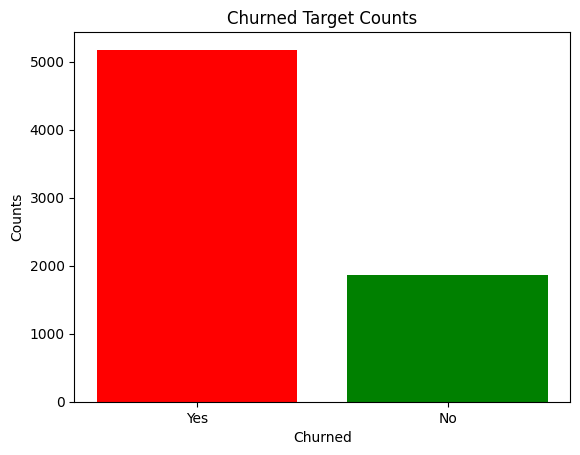

In [ ]:
import matplotlib.pyplot as plt
labels = ['Yes','No']
counts = [count_y,count_n]
plt.bar(labels, counts, color=['Red', 'Green'])

# Adding labels and title
plt.xlabel('Churned')
plt.ylabel('Counts')
plt.title('Churned Target Counts')

# Display the plot
plt.show()

In [ ]:
print("Percentage of churned candidates: \n")
print("Yes Percentage:",round((count_y/(count_y+count_n))*100,2))
print("No Percentage:",round((count_n/(count_y+count_n))*100,2))

Percentage of churned candidates: 

Yes Percentage: 73.46
No Percentage: 26.54


In [ ]:
churn_data.TotalCharges = pd.to_numeric(churn_data.TotalCharges, errors='coerce')
churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
churn_data.loc[churn_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
churn_data.dropna(how = 'any', inplace = True)

In [ ]:
churn_data.loc[churn_data ['TotalCharges'].isnull() == True] #As there is no display of rows below, we have removed rows with TotalCharges value as Nan

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Let us divide the tenure data into bins for easier understanding


In [ ]:
print(churn_data['tenure'].max())

72


In [ ]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

churn_data['tenure_group'] = pd.cut(churn_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
churn_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [ ]:
columns_to_drop = ['tenure', 'customerID']
churn_data = churn_data.drop(columns=columns_to_drop)

In [ ]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


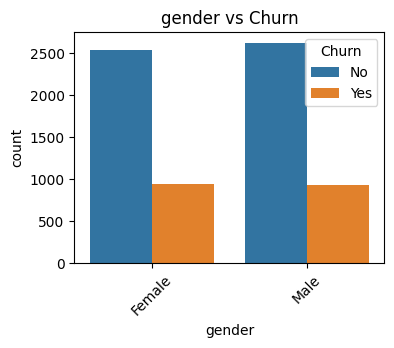

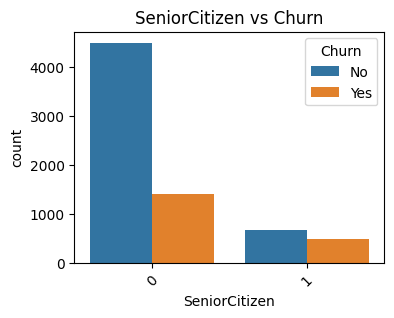

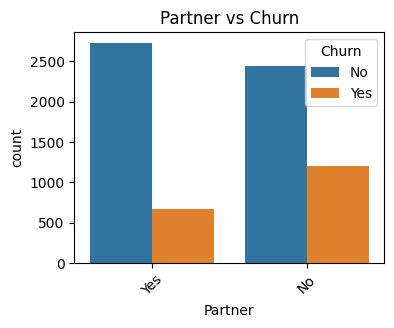

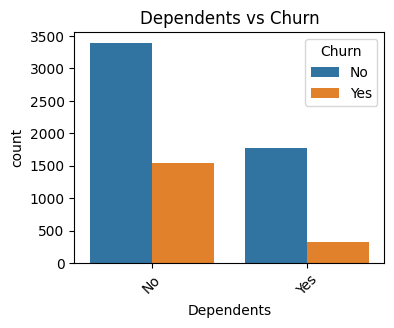

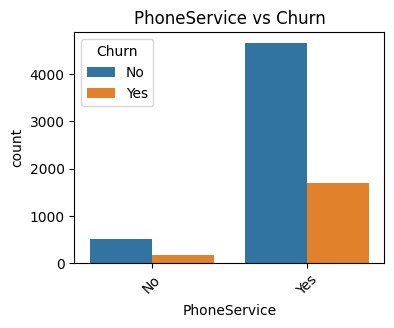

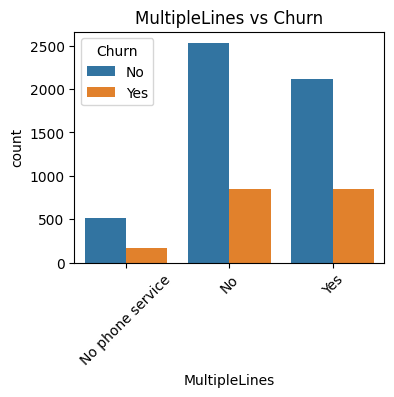

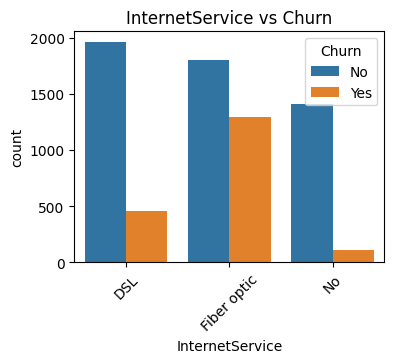

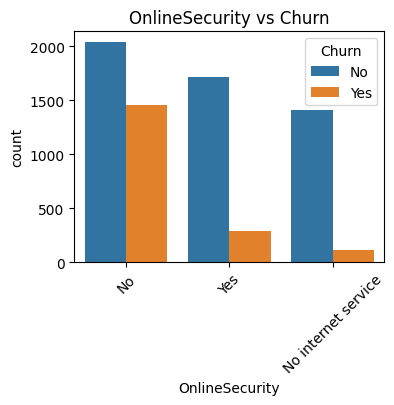

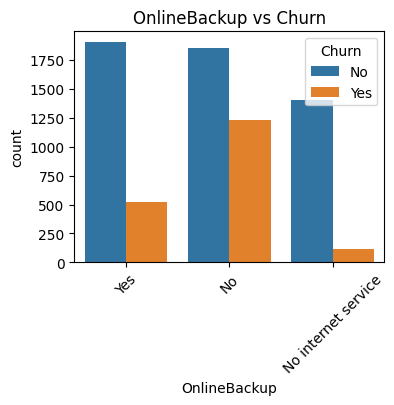

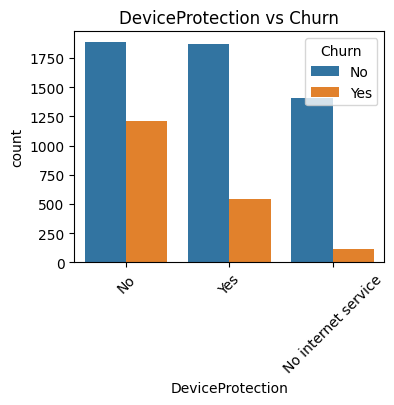

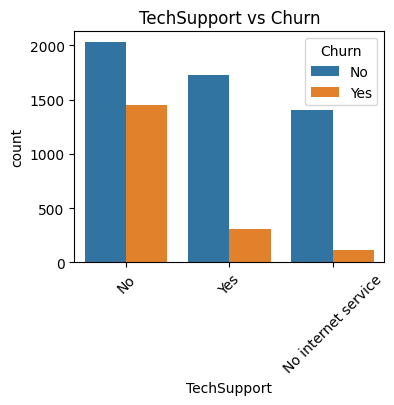

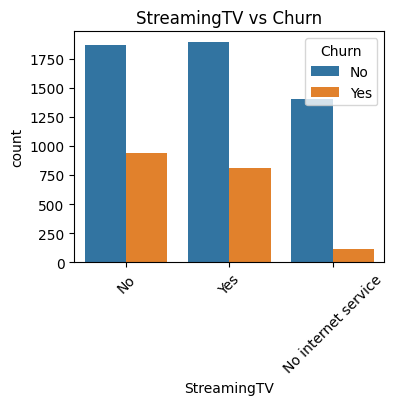

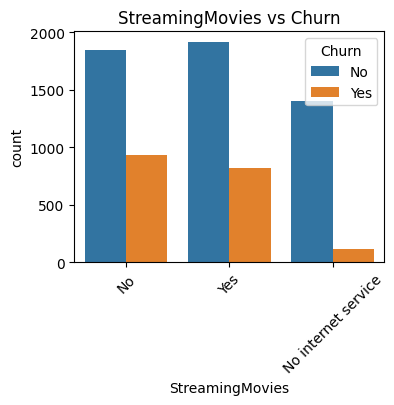

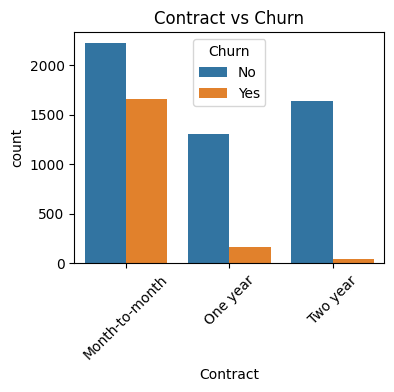

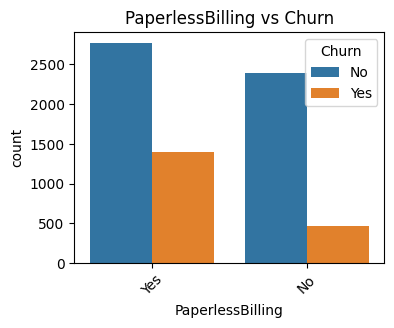

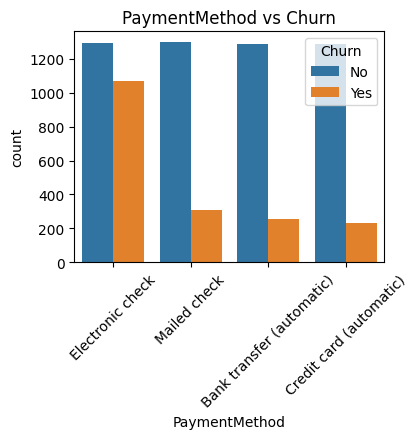

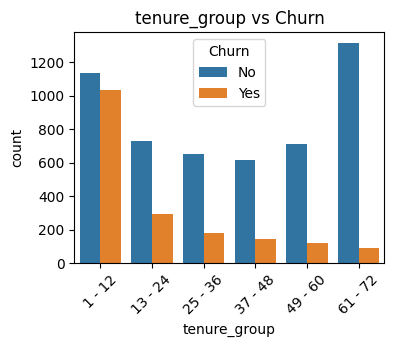

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical features
for col in churn_data.drop(columns = ['Churn','TotalCharges','MonthlyCharges']):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=churn_data, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Insights through univariate analysis:
# -Senior Citizens are less likely to churn,hence if the company retains customers upto a certain age, they will get loyal customers
# -Gender has nothing to do with churning as equal percentage of men and women churned
# -Obviously, the customers who do not have phone service have high churn percentage
# -Customers who do not have multiple lines have churned more than the ones that have
# -The customers who do not have online security have high churn percentage
# -Customers who do not have Online backup have high churn percentage
# -The customers with no tech support have churned more
# -Customers who opted for month to month contracts have churned highly
# -Customers who often paid by electronic check have churned more
# -Customers in the 1-12 year tenure have churned more

Steps to retain more customers:

*   Persuade customers to take yearly or longer contracts, month-to-month contract customers are highly likely to churn
*   Retain customers upto the lower range of senior citizens age, to have life long customers.
*   Offer online backup for low prices and also offer tech support, as customers without online backup and tech support often churned
*   Make your payment gateway secure, and reliable, people who often paid by electronic check have churned highly, obtain insights into why it is happening












In [ ]:
churn_data['Churn'] = (churn_data['Churn'] == 'Yes').astype(int)

In [ ]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [ ]:
churn_data_dummies = pd.get_dummies(churn_data)
churn_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


We have performed one hot encoding through which, telco_data_dummies will contain the original data with categorical columns replaced by one-hot encoded binary columns, which can be used as input for machine learning models that require numerical input.

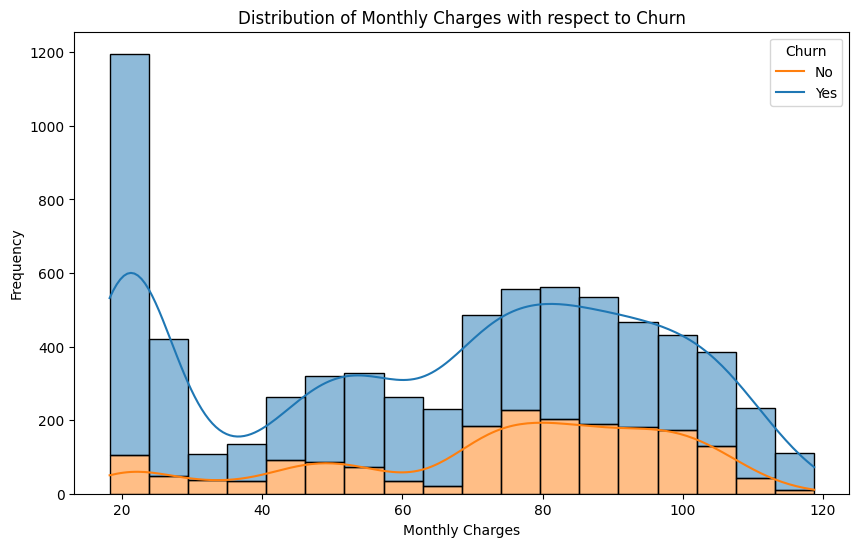

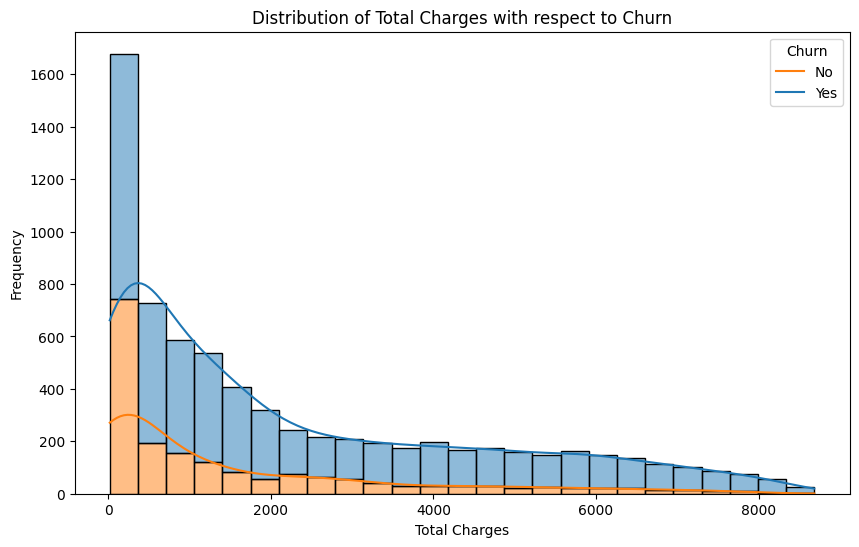

In [ ]:
#Area Chart for numerical features TotalCharges, and MonthlyCharges

plt.figure(figsize=(10, 6))
sns.histplot(data=churn_data_dummies, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Monthly Charges with respect to Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=churn_data_dummies, x='TotalCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Total Charges with respect to Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()



*   Lower Total Charges is leading to higher churn(Unexpected)

*  But what's happening: Higher monthly charge at lower tenure results lower charge but higher churn percentage.

* **Solution**: Persuade customers to take longer contracts.

**Model Building**

In [ ]:
x = churn_data_dummies.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
y = churn_data_dummies['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

Train test split (80-20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
dt.score(x_test,y_test)

0.7668798862828714

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.59      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
rf.score(x_test,y_test)

0.7661691542288557

In [ ]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1033
           1       0.58      0.43      0.49       374

    accuracy                           0.77      1407
   macro avg       0.70      0.66      0.67      1407
weighted avg       0.75      0.77      0.75      1407



Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel= 'linear',C=1.0,random_state=42)

In [ ]:
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm.predict(x_test)

In [ ]:
print(svm.score(x_test,y_test))

0.7775408670931059


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1033
           1       0.64      0.37      0.47       374

    accuracy                           0.78      1407
   macro avg       0.72      0.65      0.67      1407
weighted avg       0.76      0.78      0.76      1407



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lg.predict(x_test)

In [ ]:
print(lg.score(x_test,y_test))

0.7796730632551528


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



As we can see for the above algorithms, the accuracy for class 1, i.e, the churned candidates is less, this is because the data is imbalanced, less number of samples for the case of 1's rather than zeroes.


Let us use SMOTE for upsampling

Decision Tree(After Upsampling)

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
sm = SMOTEENN()
x_resampled,y_resampled = sm.fit_resample(x,y)

In [ ]:
xs_train,xs_test,ys_train,ys_test = train_test_split(x_resampled,y_resampled,test_size=0.2)

In [ ]:
dt_smote = DecisionTreeClassifier(criterion = 'gini',random_state = 100,max_depth = 6)

In [ ]:
dt_smote.fit(xs_train,ys_train)

DecisionTreeClassifier(max_depth=6, random_state=100)

In [ ]:
ys_pred = dt_smote.predict(xs_test)

In [ ]:
dt_smote.score(xs_test,ys_test)

0.939625850340136

In [ ]:
print(classification_report(ys_test,ys_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       543
           1       0.94      0.95      0.94       633

    accuracy                           0.94      1176
   macro avg       0.94      0.94      0.94      1176
weighted avg       0.94      0.94      0.94      1176



Random Forest(After Upsampling)

In [ ]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size = 0.2)
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100)
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(random_state=100)

In [ ]:
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [ ]:
print(model_score_r1)
print(classification_report(yr_test1, yr_predict1))

0.9538855678906917
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       519
           1       0.96      0.96      0.96       652

    accuracy                           0.95      1171
   macro avg       0.95      0.95      0.95      1171
weighted avg       0.95      0.95      0.95      1171



Logistic Regression(After Upsampling)

In [ ]:
sm = SMOTEENN()
X_resampled2, y_resampled2 = sm.fit_resample(x,y)
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_resampled2, y_resampled2,test_size = 0.2)
lg_smote=LogisticRegression()
lg_smote.fit(xr_train2,yr_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lg_smote.predict(xr_test2)
print(lg_smote.score(xr_test2,yr_test2))

0.9411269974768713


In [ ]:
print(classification_report(yr_test2,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       534
           1       0.96      0.93      0.95       655

    accuracy                           0.94      1189
   macro avg       0.94      0.94      0.94      1189
weighted avg       0.94      0.94      0.94      1189



In [ ]:
import pickle

In [ ]:
with open('customer_churn.pkl','wb') as file:
  pickle.dump(model_rf_smote,file)

In [ ]:
pip install pycaret

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *